##### Author: Tanjim Taharat Aurpa

In [1]:
import sys
import pathlib

ROOT = pathlib.Path(".").absolute().parent.parent
sys.path.append(str(ROOT))

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display 
import os
import sklearn
import numpy as np
from typing import List
import pandas as pd

### Audio class distribution and durations

In [13]:
def get_durations(audio_paths: List[str]) -> List[float]:
    audio_durations = [
        librosa.get_duration(filename=audio_path) for audio_path in audio_paths
    ]
    return audio_durations

In [20]:
def print_stats(audio_durations: List[float]) -> None:
    audio_durations = np.array(audio_durations, dtype=np.float32)
    print("Number of samples: {}".format(len(audio_durations)))
    print("Total duration: {:.2f} seconds".format(np.sum(audio_durations)))
    print("Mean duration: {:.2f} seconds".format(np.mean(audio_durations)))
    print(
        "Std. deviation of duration: {:.2f} seconds".format(
            np.std(audio_durations)
        )
    )

In [9]:
def read_csv(path_to_csv: str):
    return pd.read_csv(path_to_csv)

In [10]:
def construct_paths_to_audio(
    df: pd.DataFrame, dataset_root: pathlib.Path
) -> List[str]:
    df["track"] = df["track"].apply(
        lambda track_name: str(dataset_root.joinpath(track_name))
    )
    return df["track"].values.tolist()

In [11]:
training_part_1_csv_path = ROOT.joinpath(
    "data",
    "raw_audio",
    "spcup22",
    "training",
    "part1",
    "spcup_2022_training_part1",
    "labels.csv",
)
training_part_2_csv_path = ROOT.joinpath(
    "data",
    "raw_audio",
    "spcup22",
    "training",
    "part2",
    "spcup_2022_unseen",
    "labels.csv",
)
evaluation_part_1_csv_path = ROOT.joinpath(
    "data",
    "raw_audio",
    "spcup22",
    "evaluation",
    "part1",
    "spcup_2022_eval_part1",
    "labels_eval_part1.csv",
)
evaluation_part_2_csv_path = ROOT.joinpath(
    "data",
    "raw_audio",
    "spcup22",
    "evaluation",
    "part2",
    "spcup_2022_eval_part2",
    "labels_eval_part2.csv",
)

In [15]:
training_part_1_csv_path.parent

PosixPath('/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/training/part1/spcup_2022_training_part1')

In [29]:
print("===TRAINING PART 1===")
df = read_csv(str(training_part_1_csv_path))

print("==========================")
print("Class distribution: ")
print(df.groupby(["algorithm"]).size())
print("==========================")

audio_paths = construct_paths_to_audio(df, training_part_1_csv_path.parent)
durations = get_durations(audio_paths)
print_stats(durations)

===TRAINING PART 1===
Class distribution: 
algorithm
0    1000
1    1000
2    1000
3    1000
4    1000
dtype: int64
Number of samples: 5000
Total duration: 34794.40 seconds
Mean duration: 6.96 seconds
Std. deviation of duration: 2.53 seconds


In [30]:
print("===TRAINING PART 2 (UNKNOWN CLASS)===")
df = read_csv(str(training_part_2_csv_path))

print("==========================")
print("Class distribution: ")
print(df.groupby(["algorithm"]).size())
print("==========================")

audio_paths = construct_paths_to_audio(df, training_part_2_csv_path.parent)
durations = get_durations(audio_paths)
print_stats(durations)

===TRAINING PART 2 (UNKNOWN CLASS)===
Class distribution: 
algorithm
5    1000
dtype: int64
Number of samples: 1000
Total duration: 6791.28 seconds
Mean duration: 6.79 seconds
Std. deviation of duration: 2.22 seconds


In [32]:
print("===EVALUATION PART 1 (NOT AUGMENTED)===")
df = read_csv(str(evaluation_part_1_csv_path))
audio_paths = construct_paths_to_audio(df, evaluation_part_1_csv_path.parent)
durations = get_durations(audio_paths)
print_stats(durations)

===EVALUATION PART 1 (NOT AUGMENTED)===
Number of samples: 9000
Total duration: 61539.27 seconds
Mean duration: 6.84 seconds
Std. deviation of duration: 2.43 seconds


In [33]:
print("===EVALUATION PART 2 (AUGMENTED)===")
df = read_csv(str(evaluation_part_2_csv_path))
audio_paths = construct_paths_to_audio(df, evaluation_part_2_csv_path.parent)
durations = get_durations(audio_paths)
print_stats(durations)

===EVALUATION PART 2 (AUGMENTED)===
Number of samples: 9000
Total duration: 61418.46 seconds
Mean duration: 6.82 seconds
Std. deviation of duration: 2.43 seconds


## Feature Analysis

In [4]:
audiolist=os.listdir('Sampl Audio')
audiolist

['SmpleFromClass1.wav',
 'SmpleFromClass3.wav',
 'SmpleFromClass2.wav',
 'SmpleFromClass4Female.wav',
 'SmpleFromClass4male.wav',
 'SmpleFromClass0.wav']

# Waveforms of Audio

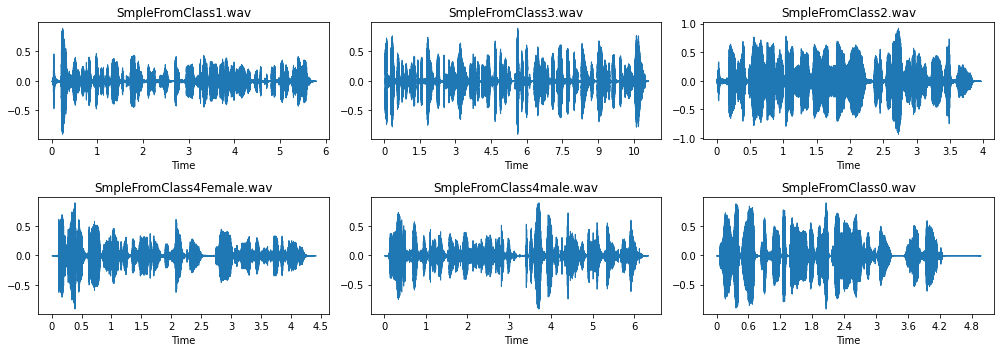

In [35]:
plt.figure(figsize=(14, 5))
for audio in audiolist:
    y, sr = librosa.load('Sampl Audio//'+audio)
    D = np.abs(librosa.stft(y))
    plt.subplot(2,3,audiolist.index(audio)+1)
    plt.title(audio)
    𝚕𝚒𝚋𝚛𝚘𝚜𝚊.𝚍𝚒𝚜𝚙𝚕𝚊𝚢.waveshow(y,sr=sr)
    plt.tight_layout()
    
plt.show()

# Spectograms

SmpleFromClass1.wav
SmpleFromClass3.wav
SmpleFromClass2.wav
SmpleFromClass4Female.wav
SmpleFromClass4male.wav
SmpleFromClass0.wav


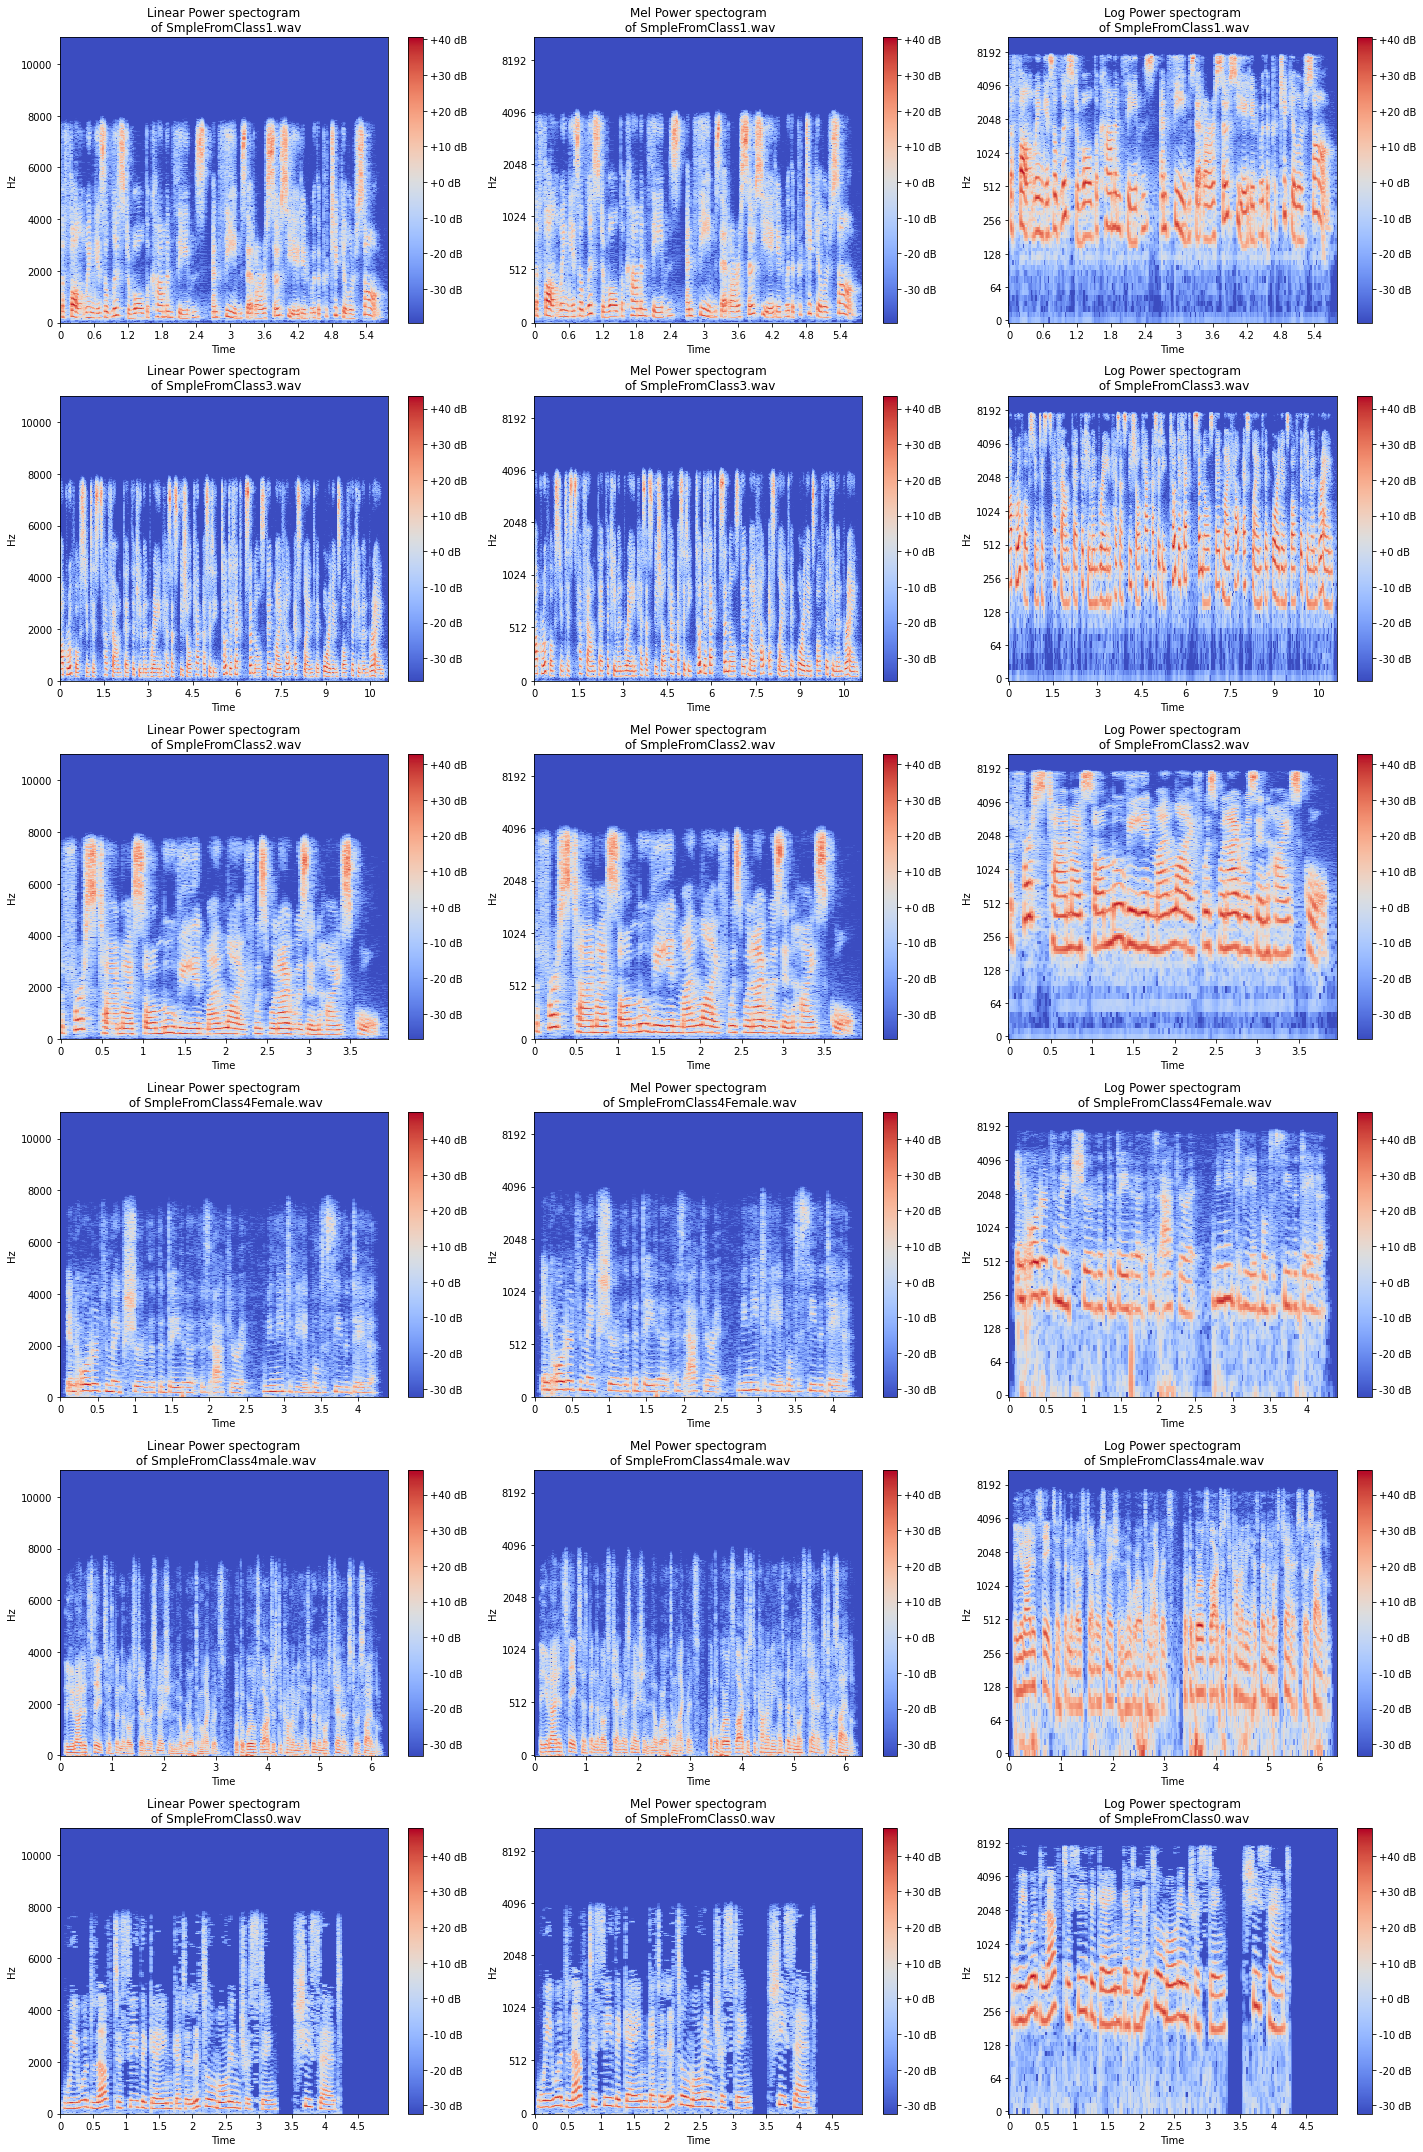

In [36]:
𝚙𝚕𝚝.𝚏𝚒𝚐𝚞𝚛𝚎(𝚏𝚒𝚐𝚜𝚒𝚣𝚎 = [20,30])
pl=1
for audio in audiolist:
    y, sr = librosa.load('Sampl Audio//'+audio)
    print(audio)
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    #Linear Power Spectrogram
    𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(6, 3, pl)
    𝚕𝚒𝚋𝚛𝚘𝚜𝚊.𝚍𝚒𝚜𝚙𝚕𝚊𝚢.specshow(Xdb, y_axis='linear', x_axis='time')
    𝚙𝚕𝚝.𝚌𝚘𝚕𝚘𝚛𝚋𝚊𝚛(𝚏𝚘𝚛𝚖𝚊𝚝='%+2.0f dB')
    𝚙𝚕𝚝.𝚝𝚒𝚝𝚕𝚎('Linear Power spectogram\n of '+audio)
    #Log Power Spectrogram
    𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝( 6, 3, pl+2)
    𝚕𝚒𝚋𝚛𝚘𝚜𝚊.𝚍𝚒𝚜𝚙𝚕𝚊𝚢.𝚜𝚙𝚎𝚌𝚜𝚑𝚘𝚠(Xdb, 𝚢_𝚊𝚡𝚒𝚜='log' , 𝚡_𝚊𝚡𝚒𝚜='time') 
    𝚙𝚕𝚝.𝚌𝚘𝚕𝚘𝚛𝚋𝚊𝚛(𝚏𝚘𝚛𝚖𝚊𝚝='%+2.0f dB')
    𝚙𝚕𝚝.𝚝𝚒𝚝𝚕𝚎('Log Power spectogram\n of '+audio)
    #Mel Power Spectrogram
    𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(6, 3, pl+1)
    𝚕𝚒𝚋𝚛𝚘𝚜𝚊.𝚍𝚒𝚜𝚙𝚕𝚊𝚢.𝚜𝚙𝚎𝚌𝚜𝚑𝚘𝚠(Xdb, 𝚢_𝚊𝚡𝚒𝚜='mel' , 𝚡_𝚊𝚡𝚒𝚜='time') 
    𝚙𝚕𝚝.𝚌𝚘𝚕𝚘𝚛𝚋𝚊𝚛(𝚏𝚘𝚛𝚖𝚊𝚝='%+2.0f dB')
    𝚙𝚕𝚝.𝚝𝚒𝚝𝚕𝚎('Mel Power spectogram\n of '+audio) 
    pl+=3
plt.tight_layout()
𝚙𝚕𝚝.𝚜𝚑𝚘𝚠()

# Zero Crossing Rate

Zero Crossing for SmpleFromClass1.wav is 9
Zero Crossing for SmpleFromClass3.wav is 6
Zero Crossing for SmpleFromClass2.wav is 56
Zero Crossing for SmpleFromClass4Female.wav is 2
Zero Crossing for SmpleFromClass4male.wav is 5
Zero Crossing for SmpleFromClass0.wav is 2


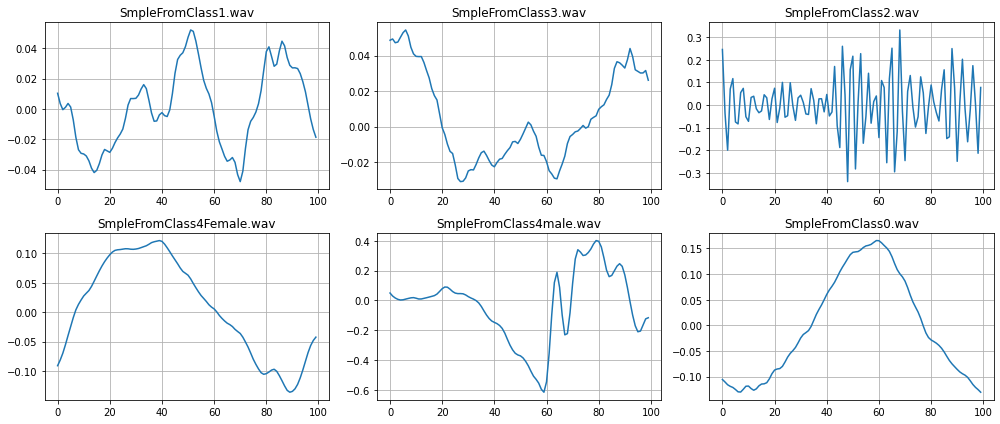

In [37]:
plt.figure(figsize=(14, 6))
for audio in audiolist:
    y, sr = librosa.load('Sampl Audio//'+audio)
    # Zooming in
    n0 = 9000
    n1 = 9100
    plt.subplot(2,3,audiolist.index(audio)+1)
    plt.plot(y[n0:n1])
    plt.title(audio)
    plt.grid()
    plt.tight_layout()
    zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
    print(f'Zero Crossing for {audio} is {sum(zero_crossings)}')

# Centroid of Spectram

In [38]:
# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
        return sklearn.preprocessing.minmax_scale(y, axis=axis)

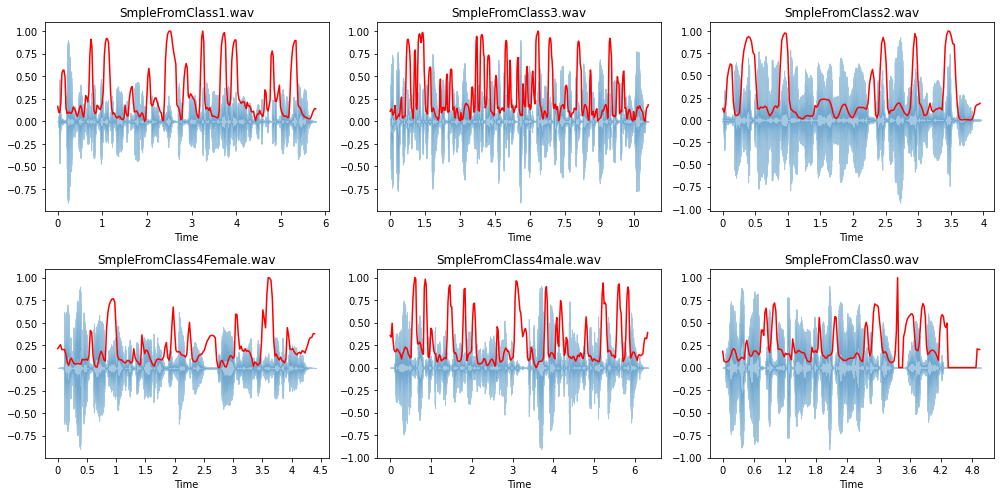

In [39]:
plt.figure(figsize=(14, 7))
for audio in audiolist:
    y, sr = librosa.load('Sampl Audio//'+audio)
    spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
    spectral_centroids.shape
    # Computing the time variable for visualization
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    #Plotting the Spectral Centroid along the waveform
    plt.subplot(2,3,audiolist.index(audio)+1)
    librosa.display.waveshow(y, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.title(audio)
    plt.tight_layout()

(20, 250)
(20, 479)
(20, 171)
(20, 190)
(20, 273)
(20, 214)


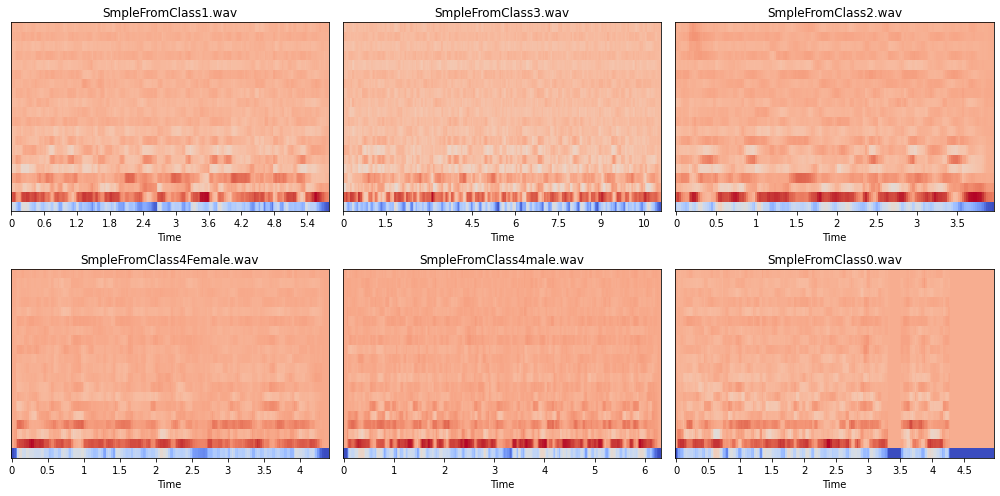

In [40]:
audio_mfcc={}
plt.figure(figsize=(14, 7))
for audio in audiolist:
    y, sr = librosa.load('Sampl Audio//'+audio)
    mfccs = librosa.feature.mfcc(y, sr=sr)
    audio_mfcc[audio]=mfccs
    print(mfccs.shape)
    plt.subplot(2,3,audiolist.index(audio)+1)
    #Displaying  the MFCCs:
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.title(audio)
    plt.tight_layout()
    